In [1]:
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Read the ride data file anf store it in a pandas dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Make sure there are no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")

66

In [12]:
# Get the number of data points from the suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [13]:
# Get the number of data points from the rural cities
sum(city_data_df["type"]=="Rural")

18

In [14]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Get the columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
# What are the data types for fare and ride_id for mathematical equations
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [18]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

# Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [22]:
# Create the suburban and Rural city dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [24]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [25]:
# Create the suburban and riral ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [26]:
# Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [27]:
# Now get the average fare for the other two city types
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [30]:
# Get the average number of drivers for each city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

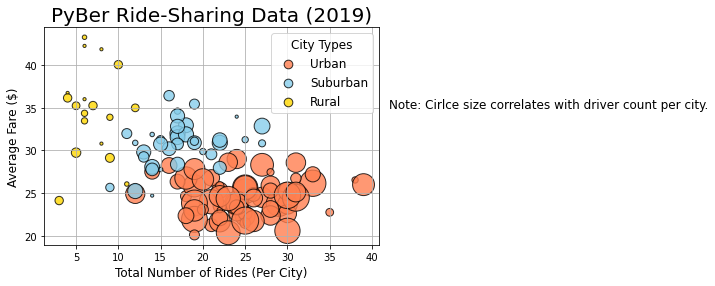

In [51]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")



# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
        suburban_avg_fare,
        s = 10*suburban_driver_count, c="skyblue",
        edgecolor="black", linewidths=1,
        alpha=0.8, label="Suburban")



# Build the scatter plots for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Adjust the legend, otherwise the legend markers will have diff sizes based on the chart
lgnd = plt.legend(fontsize="12", mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


#Incorporate a text label about circle size
plt.text(42, 35, "Note: Cirlce size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [52]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [53]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [54]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [55]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [56]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [57]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [61]:
# Calculate the mode of the ride count for the cities
urban_ride_count.mode()

0    17
dtype: int64

In [62]:
suburban_ride_count.mode()

0    17
dtype: int64

In [63]:
rural_ride_count.mode()

0    6
dtype: int64

In [64]:
# Import Numpy and the stats module from Scipy
import numpy as np
import scipy.stats as sts

In [69]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")


mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [70]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")


mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [71]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")


mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [73]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [74]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [76]:
# Get the fare of the suburban cities
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(urban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(urban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $24.64.
The mode fare price for suburban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [77]:
# Get the fare of the rural cities
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [93]:
# Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']

# Get the mean, median and mode for the urban driver count
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_driver_count:.2f}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_driver_count}.")

The mean driver count for urban cities is 36.68.
The median driver count for urban cities is 37.00.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [94]:
# Get the driver count data from the suburban cities
suburban_drivers = suburban_cities_df['driver_count']


# Get the mean, median and mode for the suburban driver count
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_driver_count:.2f}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_driver_count}.")

The mean driver count for suburban cities is 13.71.
The median driver count for suburban cities is 16.00.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [95]:
# Get the driver count data from the rural cities
rural_drivers = rural_cities_df['driver_count']


# Get the mean, median and mode for the rural driver count
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_driver_count:.2f}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_driver_count}.")

The mean driver count for rural cities is 4.30.
The median driver count for rural cities is 4.00.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).
